In [1]:
# Initialize seed
from emobpy.tools import set_seed
set_seed()

------------------------------------------------
## Step 1: Vehicle mobility time series
------------------------------------------------
a) generation of a time series

------------------------------------------------

In [44]:
from emobpy import Mobility

In [3]:
m = Mobility(config_folder='config_files')

In [4]:
m.set_params(
             name_prefix="BEV1",
             total_hours=8760, # one week
             time_step_in_hrs=0.25, # 15 minutes
             category="user_defined",
             reference_date="01/01/2020"
            )

In [5]:
m.set_stats(
            stat_ntrip_path="TripsPerDay.csv",
            stat_dest_path="DepartureDestinationTrip.csv",
            stat_km_duration_path="DistanceDurationTrip.csv",
            )

In [6]:
m.set_rules(rule_key="user_defined") # see /config_files/rules.yml, it contains a dictionary
                                     # whose key must be the same as rule_key. 
                                     # To see all possible rules `from emobpy.constants import RULE; RULE` 

In [7]:
m.run()

New profile running: BEV1_W53_9cd22
Progress: 6% [25 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 7% [26 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 9% [35 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 16% [60 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 20% [75 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 31% [114 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 34% [127 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 36% [133 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 38% [139 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 44% [161 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 45% [165 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 63% [233 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 74% [272 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 77% [282 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 81% [298 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 83% [303 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 100% [365 / 365] days
Profile done: BEV1_W53_9cd22
Elapsed time (min): 0.57


In [8]:
m.save_profile(folder="db", description='168 hrs 15 min step ref-date 01/01/2020')

 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log


In [9]:
#c.timeseries[c.timeseries.state != "home"] 

In [10]:
#c.profile[['consumption kWh/100 km', 'consumption kWh', 'battery discharge kWh']]

In [11]:
#ga.timeseries

In [12]:
#ga.profile

-------------------------
b) See some attributes

-------------------------

In [13]:
m.kind

'driving'

In [14]:
m.timeseries.distance.sum()*52

379183.99999999924

In [15]:
m.profile.head()

,hr,state,departure,arrival,last_arrival,purpose,duration,weekday,category,distance,trip_duration
10.50,10.50,home,10.75,11.00,-3.00,shopping,13.75,Wednesday,user_defined,0.0,0.0
10.75,10.75,driving,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,10.0
15.25,15.25,shopping,15.50,16.75,11.00,home,4.50,Wednesday,user_defined,0.0,0.0
16.50,16.50,driving,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,72.5
31.50,31.50,home,7.75,8.00,-7.25,shopping,15.00,Thursday,user_defined,0.0,0.0


-------------------------------
c) Profiles management

-------------------------------

In [16]:
from emobpy import DataBase

In [17]:
DB = DataBase('db')

In [18]:
DB.loadfiles()

In [19]:
DB.db.keys()

dict_keys(['BEV1_W53_9cd22'])

In [20]:
DB.db[m.name]['user_rules']

{'weekday': {'n_trip_out': [1],
  'last_trip_to': {'home': True},
  'overall_min_time_at': {'home': 9},
  'min_state_duration': {'home': 0.25,
   'errands': 0.25,
   'escort': 0.25,
   'shopping': 0.25,
   'leisure': 0.25}},
 'weekend': {'n_trip_out': [1],
  'last_trip_to': {'home': True},
  'overall_min_time_at': {'home': 6},
  'min_state_duration': {'home': 0.25,
   'errands': 0.25,
   'escort': 0.25,
   'shopping': 0.25,
   'leisure': 0.25}}}

In [21]:
DB.db[m.name]['kind']

'driving'

-------------------------
d) Visualization

-------------------------

In [22]:
from emobpy.plot import NBplot

In [23]:
#PLT = NBplot(DB)

In [24]:
#fig_mobility = PLT.sgplot_dp(m.name)

In [25]:
#fig_mobility

------------------------------------------------------
## Step 2: Driving consumption time series
------------------------------------------------------
a) Vehicle model configuration

------------------------------------------------------

In [26]:
from emobpy import Consumption, HeatInsulation, BEVspecs

In [27]:
DB.update()                # This load new files hosted in database folder as result of new generated files

In [28]:
# mname = list(DB.db.keys())[0]      # getting the id of the first mobility profile
mname = m.name

In [29]:
HI = HeatInsulation(True)            # Creating the heat insulation by copying the default configuration

In [30]:
BEVS = BEVspecs()                    # Database that contains BEV models

In [31]:
BEVS.show_models()

Audi
	e-tron 55 quattro
		2019
		2020
	e-tron 55 quattro Premium Plus
		2019
	e-tron 55 quattro Prestige
		2019
	e-tron Sportback 50 quattro
		2020
	e-tron Sportback 55 quattro
		2020
BMW
	i3 22 kWh
		2014
		2015
		2016
	i3 33 kWh
		2017
		2018
	i3 42 kWh
		2019
	i3s 33 kWh
		2018
	i3s 42 kWh
		2019
	i3s Edition RoadStyle 42 kWh
		2020
Chevrolet
	Bolt EV
		2017
		2018
		2019
		2020
	Spark EV
		2014
		2015
		2016
FIAT
	500e
		2013
		2016
		2019
Hyundai
	IONIQ Electric 28 kWh
		2019
	IONIQ Electric 38.3 kWh
		2020
	KONA Electric 64 kWh
		2019
Jaguar
	I-Pace
		2019
	I-Pace S EV400 AWD Automatic
		2020
KIA
	Soul EV
		2015
		2016
		2017
		2018
		2019
	Soul EV 39 kWh
		2020
	Soul EV 64 kWh
		2020
	e-Niro 39 kWh
		2019
	e-Niro 4
		2020
	e-Niro 64 kWh
		2019
MINI
	Cooper SE Level I
		2020
	Cooper SE Level II
		2020
	Cooper SE Level III
		2020
Nissan
	Leaf S
		2013
		2014
		2015
		2016
		2017
		2018
		2019
	Leaf S Plus
		2019
	Leaf SL
		2011
		2012
		2013
		2014
		2015
		2016
		2017
		2018
		20

In [32]:
BEVS.parameters

['acc_0_100_kmh',
 'axle_ratio',
 'battery_cap',
 'curb_weight',
 'drag_coeff',
 'motor_type',
 'height',
 'length',
 'market',
 'num_cells',
 'num_modules',
 'power',
 'reg_braking',
 'top_speed',
 'torque',
 'trunk_volume',
 'battery_type',
 'voltage',
 'weight',
 'width']

In [33]:
dataframe = BEVS.search_by_parameter()

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.appe

Parameter: power
   brand                     model  year  value unit
0  Tesla             Model S P100D  2016  568.0   kw
1  Tesla  Model S Performance (SR)  2020  568.0   kw
2  Tesla  Model S Performance (AC)  2019  568.0   kw
3  Tesla   Model S P90DL Ludicrous  2016  568.0   kw
4  Tesla   Model S P90DL Ludicrous  2015  568.0   kw
5  Tesla              Model S P90D  2016  568.0   kw
6  Tesla              Model S P90D  2015  568.0   kw
7  Tesla   Model S P85DL Ludicrous  2015  568.0   kw
8  Tesla  Model S P85D 193kW+375kW  2015  568.0   kw
9  Tesla             Model S P100D  2018  568.0   kw


C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning:

The frame.appe

In [34]:
VW_ID3 = BEVS.model(('Volkswagen','ID.3',2020))    # Model instance that contains vehicle parameters

Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fallback value 2 added for missing hvac_cop_cooling parameter.


In [35]:
VW_ID3.parameters

{'acc_0_100_kmh': None,
 'axle_ratio': 10,
 'battery_cap': 45.0,
 'curb_weight': 1600.0,
 'drag_coeff': 0.267,
 'motor_type': 'Brushless DC',
 'height': 1.552,
 'length': 4.261,
 'market': 'Europe',
 'num_cells': None,
 'num_modules': None,
 'power': 93,
 'reg_braking': 'Yes',
 'top_speed': 160.0,
 'torque': 310,
 'trunk_volume': 0.39,
 'battery_type': None,
 'voltage': None,
 'weight': None,
 'width': 1.809,
 'Brand': 'Volkswagen',
 'EV Model': 'ID.3',
 'Model year': 2020,
 'pmr': 58.125,
 'inertial_mass': 463.99999999999994,
 'front_area': 2.807568,
 'battery_charging_eff': 0.9,
 'battery_discharging_eff': 0.95,
 'transmission_eff': 0.95,
 'auxiliary_power': 0.3,
 'cabin_volume': 3.5,
 'hvac_cop_heating': 1,
 'hvac_cop_cooling': 2}

----------------------------------------------------------------------
b) Calculate consumption for each trip and generate the time series

----------------------------------------------------------------------

In [36]:
c = Consumption(mname, VW_ID3)

In [37]:
mname = "BEV2_W1_10dfc"

In [38]:
c.load_setting_mobility(DB)

In [39]:
c.run(
    heat_insulation=HI,
    weather_country='DE',
    weather_year=2016,
    passenger_mass=75,                   # kg
    passenger_sensible_heat=70,          # W
    passenger_nr=1.5,                    # Passengers per vehicle including driver
    air_cabin_heat_transfer_coef=20,     # W/(m2K). Interior walls
    air_flow = 0.02,                     # m3/s. Ventilation
    driving_cycle_type='WLTC',           # Two options "WLTC" or "EPA"
    road_type=0,                         # For rolling resistance, Zero represents a new road.
    road_slope=0
    )

New profile running: BEV1_W53_9cd22_Volkswagen_ID.3_2020_7477c
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [578 / 578] trips


In [40]:
c.save_profile('db')

 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log


------------------------------
c) See some attributes

------------------------------

In [41]:
c.name

'BEV1_W53_9cd22_Volkswagen_ID.3_2020_7477c'

In [42]:
c.kind

'consumption'

In [43]:
c.input

'BEV1_W53_9cd22'

In [44]:
c.brand, c.model, c.year

('Volkswagen', 'ID.3', '2020')

In [45]:
c.timeseries # Consumption in kWh/timestep -> timestep 15 min in this example

,hh,state,distance,consumption,instant consumption in W,average power in W
date,,,,,,
2020-01-01 00:00:00,0.0,home,0.0,0.0,0,0.0
2020-01-01 00:15:00,0.25,home,0.0,0.0,0,0.0
2020-01-01 00:30:00,0.5,home,0.0,0.0,0,0.0
2020-01-01 00:45:00,0.75,home,0.0,0.0,0,0.0
2020-01-01 01:00:00,1.0,home,0.0,0.0,0,0.0
...,...,...,...,...,...,...
2020-12-30 22:45:00,8758.75,home,0.0,0.0,0,0.0
2020-12-30 23:00:00,8759.0,home,0.0,0.0,0,0.0
2020-12-30 23:15:00,8759.25,home,0.0,0.0,0,0.0


In [46]:
c.timeseries.consumption.max()

11.837878200097293

In [47]:
c.profile.head()

,datetime,hr,state,distance,trip_duration,speed km/h,wind_m/s,slope_rad,road_type,temp_degC,...,auxiliary kWh,hvac kWh,motor in kWh,transmission in kWh,wheel kWh,rolling res kWh,air res kWh,gravity kWh,acceleration kWh,trip code
hr,,,,,,,,,,,,,,,,,,,,,
10.50,2020-01-01 10:30:00,10.50,home,0.0,0.0,NaN,0,0,0,2.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.75,2020-01-01 10:45:00,10.75,driving,2.0,10.0,12.000000,0,0,0,2.98,...,0.0500,0.144374,0.248634,0.147861,0.140468,0.090195,0.007410,0.0,0.042863,0.0
15.25,2020-01-01 15:15:00,15.25,shopping,0.0,0.0,NaN,0,0,0,4.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16.50,2020-01-01 16:30:00,16.50,driving,130.0,72.5,107.586207,0,0,0,3.73,...,0.3625,1.513986,37.788142,35.037737,33.285850,10.173165,19.860218,0.0,3.252467,1.0
31.50,2020-01-02 07:30:00,31.50,home,0.0,0.0,NaN,0,0,0,0.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-------------------------
d) Visualization

-------------------------

In [48]:
#fig_consumption = PLT.sankey(c.name, include=None, to_html=False, path=None)

In [49]:
#fig_consumption

-------------------------------------------------------------------
## Step 3: Grid availability time series
-------------------------------------------------------------------
a) probability distribution and power rating for charging stations

-------------------------------------------------------------------

In [50]:
from emobpy import Availability

In [51]:
DB.update()                               # This load new generated files that are hosted in database folder
cname = c.name                            # getting the id of the first consumption profile


station_distribution = {                  # Dictionary with charging stations type probability distribution per the purpose of the trip (location or destination)
    'prob_charging_point': {
        'errands': {'public': 0.5, 'none': 0.5},
        'escort': {'public': 0.5, 'none': 0.5},
        'leisure': {'public': 0.5, 'none': 0.5},
        'shopping': {'public': 0.5, 'none': 0.5},
        'home': {'public': 0.5, 'none': 0.5},
        'workplace': {'public': 0.0, 'workplace': 1.0, 'none': 0.0},   # If the vehicle is at the workplace, it will always find a charging station available (assumption)
        'driving': {'none': 0.99, 'fast75': 0.005, 'fast150': 0.005}}, # with the low probability given to fast charging is to ensure fast charging only for very long trips (assumption)
    'capacity_charging_point': {                                       # Nominal power rating of charging station in kW
        'public': 22,
        'home': 3.7,
        'workplace': 11,
        'none': 0,  # dummy station
        'fast75': 75,
        'fast150': 150}
}

--------------------------------
b) Generate time series

--------------------------------

In [52]:
ga = Availability(cname, DB)

In [53]:
ga.set_scenario(station_distribution)

In [54]:
ga.run()

soc_init:0.5 --> soc_end:0.984
Profile done: BEV1_W53_9cd22_Volkswagen_ID.3_2020_7477c_avai_22adc


In [55]:
ga.save_profile('db')

 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log


--------------------------------
b) See some attributes

--------------------------------

In [56]:
ga.name

'BEV1_W53_9cd22_Volkswagen_ID.3_2020_7477c_avai_22adc'

In [57]:
ga.input

'BEV1_W53_9cd22_Volkswagen_ID.3_2020_7477c'

In [58]:
ga.kind

'availability'

In [59]:
ga.battery_capacity

45.0

In [60]:
ga.charging_eff

0.9

In [61]:
ga.discharging_eff

0.95

In [62]:
ga.soc_init

0.5

In [63]:
ga.soc_min

0.02

In [64]:
ga.timeseries

,hh,state,distance,consumption,charging_point,charging_cap,soc
date,,,,,,,
2020-01-01 00:00:00,0.0,home,0.0,0.0,public,22,0.61
2020-01-01 00:15:00,0.25,home,0.0,0.0,public,22,0.72
2020-01-01 00:30:00,0.5,home,0.0,0.0,public,22,0.83
2020-01-01 00:45:00,0.75,home,0.0,0.0,public,22,0.94
2020-01-01 01:00:00,1.0,home,0.0,0.0,public,22,1.0
...,...,...,...,...,...,...,...
2020-12-30 22:45:00,8758.75,home,0.0,0.0,none,0,0.983936
2020-12-30 23:00:00,8759.0,home,0.0,0.0,none,0,0.983936
2020-12-30 23:15:00,8759.25,home,0.0,0.0,none,0,0.983936


In [65]:
consumption_ts = ga.timeseries.consumption ##
availability_ts = ga.timeseries.charging_cap

In [66]:
availability_ts.to_pickle("availability_ts")
consumption_ts.to_pickle("consumption_ts")

-------------------------
c) Visualization

-------------------------

In [68]:
#fig_availability = PLT.sgplot_ga(ga.name, rng=None, to_html=False, path=None)

In [69]:
#fig_availability

----------------------------------------------------------
## Step 4: Grid electricity demand time series
----------------------------------------------------------
a) Selection of charging strategies

---------------------------------------

In [70]:
from emobpy import Charging


In [71]:
DB.update()

aname = ga.name                            # getting the id of the availability profile

strategies = [
              "immediate",                 # When battery has SOC < 100% then it charges immediatelly at a maximun power rating of the current charging station
              "balanced",                  # When battery has SOC < 100% then it charges immediatelly but at lower rating power to ensure 100% SOC at the end (before moving to another place).
              "from_0_to_24_at_home",      # Customized: starting time of charging (this case 0 hrs), final time of charging (this case 24 hrs), at could be one 'location' (this case 'home') or 'any'.
              "from_23_to_8_at_any"
             ]



------------------------------------------------------
b) generation of 4 grid electricity demand time series

------------------------------------------------------

In [72]:
for option in strategies:
    ged = Charging(aname)
    ged.load_scenario(DB)
    ged.set_sub_scenario(option)
    ged.run()
    print(f'Creation Successful:{ged.success}')   # if False, modify the strategy to a less constrained.
    ged.save_profile('db')

Balance: -0.01. Consumption: 1352.56. charge_battery: 1374.33. sto_init: 22.5. sto_end: 44.28
Profile done: BEV1_W53_9cd22_Volkswagen_ID.3_2020_7477c_avai_22adc_immediate_adc3a
Creation Successful:True
Balance: -0.01. Consumption: 1352.56. charge_battery: 1374.33. sto_init: 22.5. sto_end: 44.28
Profile done: BEV1_W53_9cd22_Volkswagen_ID.3_2020_7477c_avai_22adc_balanced_280fb
Creation Successful:True
Balance: -0.01. Consumption: 1352.56. charge_battery: 1372.8. sto_init: 22.5. sto_end: 42.75
Profile done: BEV1_W53_9cd22_Volkswagen_ID.3_2020_7477c_avai_22adc_from_0_to_24_at_home_f583d
Creation Successful:True
Balance: -0.01. Consumption: 1352.56. charge_battery: 1372.8. sto_init: 22.5. sto_end: 42.75
Profile done: BEV1_W53_9cd22_Volkswagen_ID.3_2020_7477c_avai_22adc_from_23_to_8_at_any_e4e48
Creation Successful:True


-----------------------------------------------------------------------------
c) See some atributes for the last created time series as an example

-----------------------------------------------------------------------------

In [73]:
ged.name

'BEV1_W53_9cd22_Volkswagen_ID.3_2020_7477c_avai_22adc_from_23_to_8_at_any_e4e48'

In [74]:
ged.input

'BEV1_W53_9cd22_Volkswagen_ID.3_2020_7477c_avai_22adc'

In [75]:
ged.kind

'charging'

In [76]:
ged.option

'from_23_to_8_at_any'

In [77]:
ged.timeseries

,hh,state,distance,consumption,charging_point,charging_cap,actual_soc,charge_battery,charge_grid
date,,,,,,,,,
2020-01-01 00:00:00,0.0,home,0.0,0.0,public,22,0.511628,2.093023,2.325581
2020-01-01 00:15:00,0.25,home,0.0,0.0,public,22,0.523256,2.093023,2.325581
2020-01-01 00:30:00,0.5,home,0.0,0.0,public,22,0.534884,2.093023,2.325581
2020-01-01 00:45:00,0.75,home,0.0,0.0,public,22,0.546512,2.093023,2.325581
2020-01-01 01:00:00,1.0,home,0.0,0.0,public,22,0.55814,2.093023,2.325581
...,...,...,...,...,...,...,...,...,...
2020-12-30 22:45:00,8758.75,home,0.0,0.0,none,0,0.949939,0.0,0.0
2020-12-30 23:00:00,8759.0,home,0.0,0.0,none,0,0.949939,0.0,0.0
2020-12-30 23:15:00,8759.25,home,0.0,0.0,none,0,0.949939,0.0,0.0


In [78]:
ged.timeseries.consumption

date
2020-01-01 00:00:00    0.0
2020-01-01 00:15:00    0.0
2020-01-01 00:30:00    0.0
2020-01-01 00:45:00    0.0
2020-01-01 01:00:00    0.0
                      ... 
2020-12-30 22:45:00    0.0
2020-12-30 23:00:00    0.0
2020-12-30 23:15:00    0.0
2020-12-30 23:30:00    0.0
2020-12-30 23:45:00    0.0
Freq: 15T, Name: consumption, Length: 35040, dtype: object

In [45]:
import pandas as pd

<AxesSubplot:xlabel='date', ylabel='kWh/100km'>

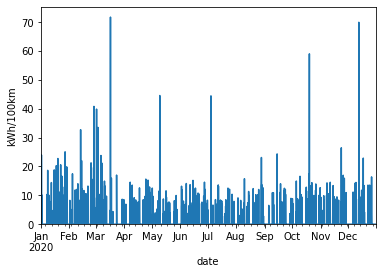

In [86]:
specific_cons= pd.concat([ged.timeseries.consumption, ged.timeseries.distance], axis=1).apply(lambda row : row["consumption"] / row["distance"] if row["distance"] != 0 else 0, axis=1)*100
specific_cons.resample("h").mean().plot(ylim=0, ylabel="kWh/100km")

-------------------------
d) Visualization

-------------------------

In [84]:
#fig_ged = PLT.sgplot_ged(ged.name, rng=None, to_html=False, path=None) # this looks for all strategies of a single grid availability time series, even though we provide one grid demand id

In [83]:
#fig_ged

------------------------------------------------------
### Visualize all time series of a vehicle profile
------------------------------------------------------

In [ ]:
#fig_channel = PLT.overview(ged.name)

In [85]:
#fig_channel

------------------------------------------------------------
### Export all time-series in 'db' folder to [DIETER](https://diw-evu.gitlab.io/dieter_public/dieterpy/) format
-----------------------------------------------------------------------------------------------------------
After exporting see the two CSV files at "db" folder

--------------------------------------------------------------------

In [ ]:
from emobpy import Export

In [ ]:
DB.update()
Exp = Export()
Exp.loaddata(DB)
Exp.to_csv()
Exp.save_files()

-------------------------------------------------------------------------------
### Download weather data from [Zenodo](https://zenodo.org/record/1489915)
-------------------------------------------------------------------------------
Total size: 300 MB

This function allows us to select different countries and years when creating new driving consumption time-series.

After finishing the download, you will get the location of the files on your PC. If you want to add more countries, you can edit the CSV files there.

emobpy includes Germany's weather data only for 2016. This data set has several European countries and years from 2000-2017.

-------------------------------------------------------------------------------

In [ ]:
# from emobpy import Weather

In [ ]:
# WD = Weather()

In [ ]:
# WD.download_weather_data()

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
from emobpy import Mobility
for i in range(2):
    m = Mobility(config_folder='config_files')
    m.set_params(
                 name_prefix="BEV1",
                 total_hours=8760, # one week
                 time_step_in_hrs=0.25, # 15 minutes
                 category="user_defined",
                 reference_date="01/01/2020"
                )
    m.set_stats(
                stat_ntrip_path="TripsPerDay.csv",
                stat_dest_path="DepartureDestinationTrip.csv",
                stat_km_duration_path="DistanceDurationTrip.csv",
                )
    m.set_rules(rule_key="user_defined") # see /config_files/rules.yml, it contains a dictionary
                                         # whose key must be the same as rule_key. 
                                         # To see all possible rules `from emobpy.constants import RULE; RULE`
    m.run()
    m.save_profile(folder="db", description='168 hrs 15 min step ref-date 01/01/2020')
    from emobpy import DataBase
    DB = DataBase('db')
    DB.loadfiles()
    from emobpy import Consumption, HeatInsulation, BEVspecs
    mname = m.name ###
    HI = HeatInsulation(True)            # Creating the heat insulation by copying the default configuration
    BEVS = BEVspecs()                    # Database that contains BEV models
    dataframe = BEVS.search_by_parameter()
    VW_ID3 = BEVS.model(('Volkswagen','ID.3',2020))    # Model instance that contains vehicle 
    c = Consumption(mname, VW_ID3)
    c.load_setting_mobility(DB)
    c.run(
        heat_insulation=HI,
        weather_country='DE',
        weather_year=2016,
        passenger_mass=75,                   # kg
        passenger_sensible_heat=70,          # W
        passenger_nr=1.5,                    # Passengers per vehicle including driver
        air_cabin_heat_transfer_coef=20,     # W/(m2K). Interior walls
        air_flow = 0.02,                     # m3/s. Ventilation
        driving_cycle_type='WLTC',           # Two options "WLTC" or "EPA"
        road_type=0,                         # For rolling resistance, Zero represents a new road.
        road_slope=0
        )
    c.save_profile('db')
    from emobpy import Availability
    DB.update()                               # This load new generated files that are hosted in database folder
    cname = c.name                            # getting the id of the first consumption profile


    station_distribution = {                  # Dictionary with charging stations type probability distribution per the purpose of the trip (location or destination)
        'prob_charging_point': {
            'errands': {'public': 0.5, 'none': 0.5},
            'escort': {'public': 0.5, 'none': 0.5},
            'leisure': {'public': 0.5, 'none': 0.5},
            'shopping': {'public': 0.5, 'none': 0.5},
            'home': {'public': 0.5, 'none': 0.5},
            'workplace': {'public': 0.0, 'workplace': 1.0, 'none': 0.0},   # If the vehicle is at the workplace, it will always find a charging station available (assumption)
            'driving': {'none': 0.99, 'fast75': 0.005, 'fast150': 0.005}}, # with the low probability given to fast charging is to ensure fast charging only for very long trips (assumption)
        'capacity_charging_point': {                                       # Nominal power rating of charging station in kW
            'public': 22,
            'home': 3.7,
            'workplace': 11,
            'none': 0,  # dummy station
            'fast75': 75,
            'fast150': 150}
    }
    
    ga = Availability(c.name , DB)
    ga.set_scenario(station_distribution)
    ga.run()
    ga.save_profile('db')
    
    from emobpy import Charging
    DB.update()

    specific_cons = pd.DataFrame()

    aname = ga.name                            # getting the id of the availability profile

    strategies = [
                  "immediate",                 # When battery has SOC < 100% then it charges immediatelly at a maximun power rating of the current charging station
                  "balanced",                  # When battery has SOC < 100% then it charges immediatelly but at lower rating power to ensure 100% SOC at the end (before moving to another place).
                  "from_0_to_24_at_home",      # Customized: starting time of charging (this case 0 hrs), final time of charging (this case 24 hrs), at could be one 'location' (this case 'home') or 'any'.
                  "from_23_to_8_at_any"
                 ]
    for option in strategies:
        ged = Charging(aname)
        ged.load_scenario(DB)
        ged.set_sub_scenario(option)
        ged.run()
        print(f'Creation Successful:{ged.success}')   # if False, modify the strategy to a less constrained.
        ged.save_profile('db')

        ts= pd.concat([ged.timeseries.consumption, ged.timeseries.distance], axis=1).apply(lambda row : row["consumption"] / row["distance"] if row["distance"] != 0 else 0, axis=1)*100
        specific_cons = pd.concat([specific_cons, ts], axis=1)




New profile running: BEV1_W53_b8978
Progress: 6% [22 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 13% [48 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 16% [59 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 18% [68 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 35% [128 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 36% [133 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 39% [144 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 41% [152 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 42% [154 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 44% [164 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

Progress: 53% [197 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 54% [198 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

Progress: 55% [201 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 55% [202 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

Progress: 56% [208 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 57% [210 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 63% [232 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 63% [233 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 69% [252 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 69% [254 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

Progress: 70% [259 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 77% [283 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 81% [299 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 83% [304 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 91% [335 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 95% [348 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 97% [357 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

Progress: 98% [359 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 100% [365 / 365] days
Profile done: BEV1_W53_b8978
Elapsed time (min): 0.3
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log


C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-pa

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-pa

Parameter: power
   brand                     model  year  value unit
0  Tesla             Model S P100D  2016  568.0   kw
1  Tesla  Model S Performance (SR)  2020  568.0   kw
2  Tesla  Model S Performance (AC)  2019  568.0   kw
3  Tesla   Model S P90DL Ludicrous  2016  568.0   kw
4  Tesla   Model S P90DL Ludicrous  2015  568.0   kw
5  Tesla              Model S P90D  2016  568.0   kw
6  Tesla              Model S P90D  2015  568.0   kw
7  Tesla   Model S P85DL Ludicrous  2015  568.0   kw
8  Tesla  Model S P85D 193kW+375kW  2015  568.0   kw
9  Tesla             Model S P100D  2018  568.0   kw
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fall

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-pa

New profile running: BEV1_W53_b8978_Volkswagen_ID.3_2020_a2e19
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [712 / 712] trips
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
soc_init:0.5 --> soc_end:0.928
Profile done: BEV1_W53_b8978_Volkswagen_ID.3_2020_a2e19_avai_881bb
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
Balance: 0.01. Consumption: 2289.25. charge_battery: 2308.51. sto_init: 22.5. sto_end: 41.75
Profile done: BEV1_W53_b8978_Volkswagen_ID.3_2020_a2e19_avai_881bb_immediate_f140f
Creation Successful:True
Balance: 0.01. Consumption: 2289.25. charge_battery: 2308.51. sto_init: 22.5. sto_end: 41.75
Profile done: BEV1_W53_b8978_Volkswagen_ID.3_2020_a2e19_avai_881bb_balanced_39d3c
Creation Successful:True
Profile done: BEV1_W53_b8978_Volkswagen_ID.3_2020_a2e19_avai_881bb_from_0_to_24_at_home_

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 4% [16 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 5% [19 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 9% [36 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 11% [41 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 19% [71 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 32% [119 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 42% [154 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 48% [177 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 66% [243 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 69% [254 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 70% [257 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 70% [258 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.appe

Progress: 73% [269 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 80% [295 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 84% [307 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 84% [309 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 90% [329 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 95% [349 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 98% [360 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(


Progress: 100% [365 / 365] days

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\mobility.py:1187: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.logdf = self.logdf.append(



Profile done: BEV1_W53_7e00d
Elapsed time (min): 0.28
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log


C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-pa

Parameter: power
   brand                     model  year  value unit
0  Tesla             Model S P100D  2016  568.0   kw
1  Tesla  Model S Performance (SR)  2020  568.0   kw
2  Tesla  Model S Performance (AC)  2019  568.0   kw
3  Tesla   Model S P90DL Ludicrous  2016  568.0   kw
4  Tesla   Model S P90DL Ludicrous  2015  568.0   kw
5  Tesla              Model S P90D  2016  568.0   kw
6  Tesla              Model S P90D  2015  568.0   kw
7  Tesla   Model S P85DL Ludicrous  2015  568.0   kw
8  Tesla  Model S P85D 193kW+375kW  2015  568.0   kw
9  Tesla             Model S P100D  2018  568.0   kw
Fallback value 0.9 added for missing battery_charging_eff parameter.
Fallback value 0.95 added for missing battery_discharging_eff parameter.
Fallback value 0.95 added for missing transmission_eff parameter.
Fallback value 0.3 added for missing auxiliary_power parameter.
Fallback value 3.5 added for missing cabin_volume parameter.
Fallback value 1 added for missing hvac_cop_heating parameter.
Fall

C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-packages\emobpy\consumption.py:413: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
C:\Users\j.muessel\Miniconda3\envs\pyenv\lib\site-pa

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [688 / 688] trips
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
soc_init:0.5 --> soc_end:1.0
Profile done: BEV1_W53_7e00d_Volkswagen_ID.3_2020_a5d22_avai_9832d
 
See Log files
C:\Users\j.muessel\Documents\GitHub\EES\Emobpy\my_emobpy\log\emobpy.log
Profile done: BEV1_W53_7e00d_Volkswagen_ID.3_2020_a5d22_avai_9832d_immediate_5552d
Creation Successful:True
Profile done: BEV1_W53_7e00d_Volkswagen_ID.3_2020_a5d22_avai_9832d_balanced_0faf7
Creation Successful:True
Profile done: BEV1_W53_7e00d_Volkswagen_ID.3_2020_a5d22_avai_9832d_from_0_to_24_at_home_56e1b
Creation Successful:True
Profile done: BEV1_W53_7e00d_Volkswagen_ID.3_2020_a5d22_avai_9832d_from_23_to_8_at_any_61df1
Creation Successful:True


In [42]:
anames = list(DB.db.keys())
anames

['BEV1_W53_b8978_Volkswagen_ID.3_2020_a2e19_avai_881bb',
 'BEV1_W53_b8978_Volkswagen_ID.3_2020_a2e19_avai_881bb_immediate_f140f',
 'BEV1_W53_7e00d',
 'BEV1_W53_b8978',
 'BEV1_W53_b8978_Volkswagen_ID.3_2020_a2e19_avai_881bb_from_0_to_24_at_home_0ea79_FAIL',
 'BEV1_W53_b8978_Volkswagen_ID.3_2020_a2e19',
 'BEV1_W53_b8978_Volkswagen_ID.3_2020_a2e19_avai_881bb_from_23_to_8_at_any_83dee_FAIL',
 'BEV1_W53_b8978_Volkswagen_ID.3_2020_a2e19_avai_881bb_balanced_39d3c',
 'BEV1_W53_7e00d_Volkswagen_ID.3_2020_a5d22',
 'BEV1_W53_7e00d_Volkswagen_ID.3_2020_a5d22_avai_9832d']

In [46]:
#specific_cons.to_pickle("specific_consumption")
specific_cons = pd.read_pickle("specific_consumption")

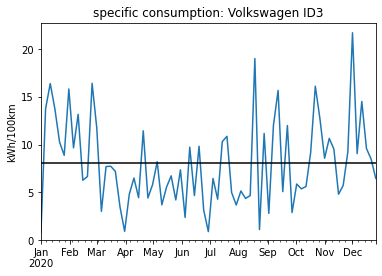

In [63]:
df = specific_cons.mean(1).resample("5D").mean()*10
df.plot(ylim=0, ylabel="kWh/100km", title = "specific consumption: Volkswagen ID3")
plt.hlines(df.mean(), df.index[0],  df.index[-1], color="black")